In [1]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

from utils import load_dataset, extract_final_losses, plot_training_error_curves, compute_performance_metrics, print_metrics_summary

In [2]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646, 2)
(97300, 243) (97300, 2)


In [3]:
epochs = 10000
batch_size = 512
patience = 10
validation_fraction = 0.33

In [4]:
classifier = RandomForestClassifier(n_estimators=10, max_depth=5)

In [5]:
classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10)

In [6]:
y_pred = classifier.predict(x_test)
y_pred_proba = classifier.predict_proba(x_test)

In [31]:
confusion_matrix(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))

array([[35362, 10498],
       [28413, 23027]])

[0 0 0 ... 1 1 1]
[1 1 0 ... 1 1 0]


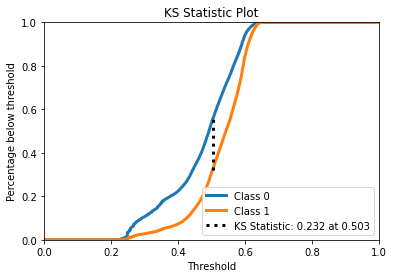


Accuracy:         0.5909
Recall:           0.6928
Precision:        0.4405
F1:               0.5385
AUROC:            0.6632
AUPR:             0.4911


In [7]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [52]:
classifier1 = RandomForestClassifier(n_estimators=50, max_depth=5)

In [53]:
classifier1.fit(x_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=70)

In [54]:
y_pred = classifier1.predict(x_test)
y_pred_proba = classifier1.predict_proba(x_test)

In [56]:
confusion_matrix(np.argmax(y_pred, axis=1), np.argmax(y_test, axis=1))

array([[35582, 10594],
       [28193, 22931]])

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 1 0]


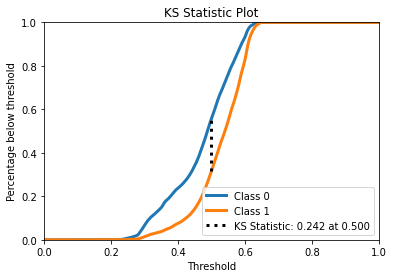


Accuracy:         0.6014
Recall:           0.6840
Precision:        0.4485
F1:               0.5418
AUROC:            0.6689
AUPR:             0.4971


In [55]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [79]:
classifier2 = RandomForestClassifier(n_estimators=50, max_depth=20)

In [80]:
classifier2.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=50)

In [81]:
y_pred = classifier2.predict(x_test)
y_pred_proba = classifier2.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[0 0 0 ... 0 1 1]


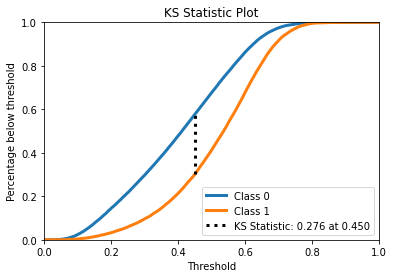


Accuracy:         0.6449
Recall:           0.5881
Precision:        0.4874
F1:               0.5330
AUROC:            0.6879
AUPR:             0.5120


In [82]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [159]:
classifier3 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200)

In [160]:
classifier3.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_leaf=200, n_estimators=50)

In [161]:
y_pred = classifier3.predict(x_test)
y_pred_proba = classifier3.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 0 1]


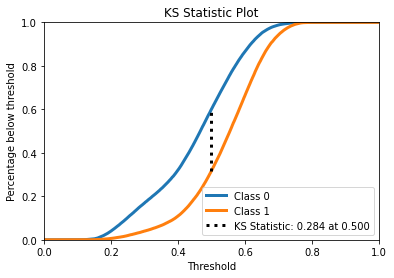


Accuracy:         0.6291
Recall:           0.6824
Precision:        0.4735
F1:               0.5590
AUROC:            0.6956
AUPR:             0.5305


In [162]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [23]:
classifier4 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200, max_features=.4)

In [24]:
classifier4.fit(x_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.4, min_samples_leaf=200,
                       n_estimators=50)

In [25]:
y_pred = classifier4.predict(x_test)
y_pred_proba = classifier4.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 0 0]


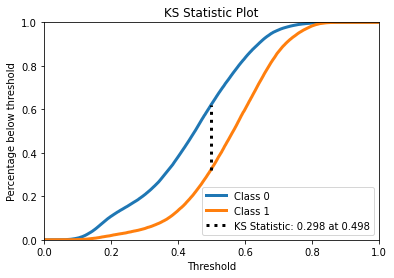


Accuracy:         0.6409
Recall:           0.6737
Precision:        0.4848
F1:               0.5639
AUROC:            0.7045
AUPR:             0.5415


In [26]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [27]:
classifier5 = RandomForestClassifier(n_estimators=50, max_depth=20, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [28]:
classifier5.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.4,
                       min_samples_leaf=200, n_estimators=50)

In [29]:
y_pred = classifier5.predict(x_test)
y_pred_proba = classifier5.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 0 0]


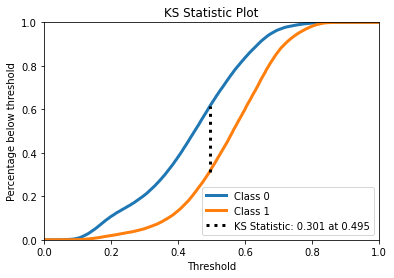


Accuracy:         0.6418
Recall:           0.6718
Precision:        0.4857
F1:               0.5638
AUROC:            0.7053
AUPR:             0.5418


In [30]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [4]:
classifier6 = RandomForestClassifier(n_estimators=100, max_depth=20, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [5]:
classifier6.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=0.4,
                       min_samples_leaf=200)

In [6]:
y_pred = classifier6.predict(x_test)
y_pred_proba = classifier6.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 1 0]


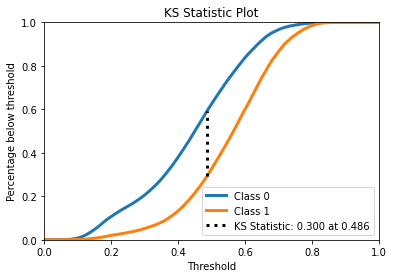


Accuracy:         0.6415
Recall:           0.6748
Precision:        0.4855
F1:               0.5647
AUROC:            0.7055
AUPR:             0.5429


In [7]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [8]:
classifier7 = RandomForestClassifier(n_estimators=50, max_depth=25, min_samples_leaf=200, max_features=.4, criterion="entropy")

In [9]:
classifier7.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=25, max_features=0.4,
                       min_samples_leaf=200, n_estimators=50)

In [10]:
y_pred = classifier7.predict(x_test)
y_pred_proba = classifier7.predict_proba(x_test)

[0 0 0 ... 1 1 1]
[1 0 0 ... 1 1 0]


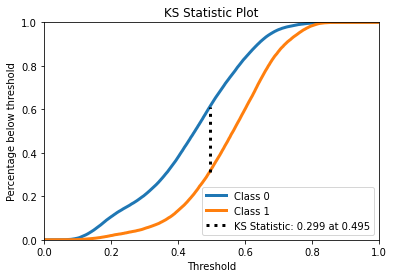


Accuracy:         0.6408
Recall:           0.6735
Precision:        0.4847
F1:               0.5637
AUROC:            0.7044
AUPR:             0.5409


In [11]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba[-1])
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)